In [174]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [176]:
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
cols_del=['Unnamed: 3','Unnamed: 4','Unnamed: 2']
df=df.drop(columns=cols_del)
#df.drop('Unnamed: 3',axis=1,inplace=True)
#df.drop('Unnamed: 4',axis=1,inplace=True)
#df.sample(5)
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [177]:
df.sample(5)

,message_type,message
3352,ham,I emailed yifeng my part oredi.. Can Ì_ get it...
4580,ham,Not course. Only maths one day one chapter wit...
2280,ham,R Ì_ comin back for dinner?
2990,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
3978,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...


In [178]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [179]:
df.isnull().sum()
df.duplicated().sum()

403

In [180]:
df= df.drop_duplicates()

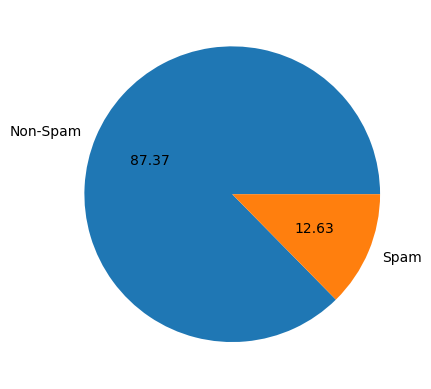

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

df['message_type'].value_counts()
plt.pie(df['message_type'].value_counts(),labels=['Non-Spam','Spam'],autopct='%0.2f')
plt.show()

In [182]:
#natural language tool kit
import nltk
nltk.download('punkt')

df['num_characters']=df['message'].apply(len)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [183]:
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
1971,0,Enjoy ur life. . Good night,27,7
1370,0,Hope you are feeling great. Pls fill me in. Ab...,50,12
4011,0,Discussed with your mother ah?,30,6
3233,0,Yup Ì_ not comin :-(,20,7
3859,0,Yep. I do like the pink furniture tho.,38,10


In [184]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [185]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [186]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

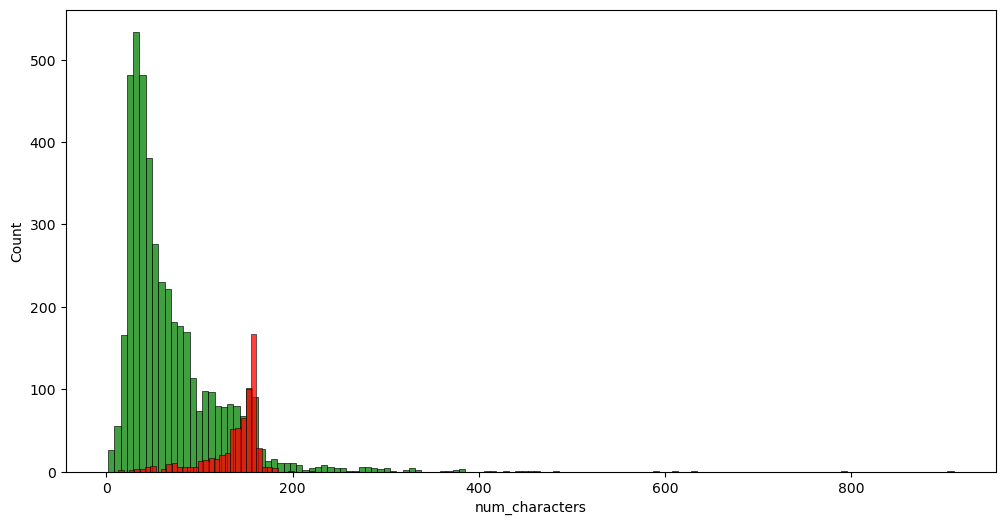

In [187]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<AxesSubplot:>

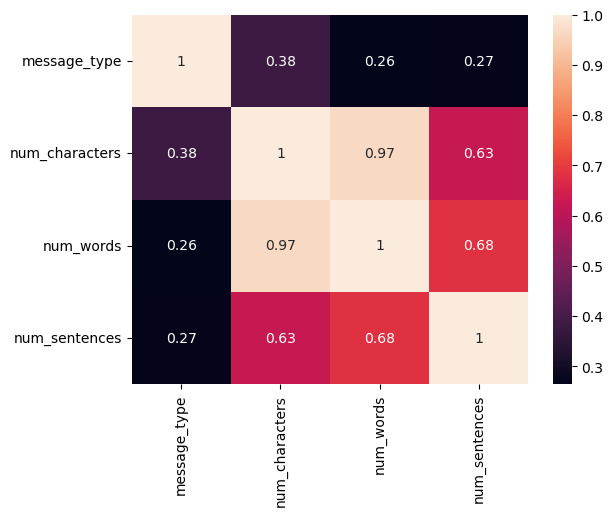

In [188]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

In [189]:
#-----------------------------------------------------------------------#

ham     4825
spam     747
Name: v1, dtype: int64

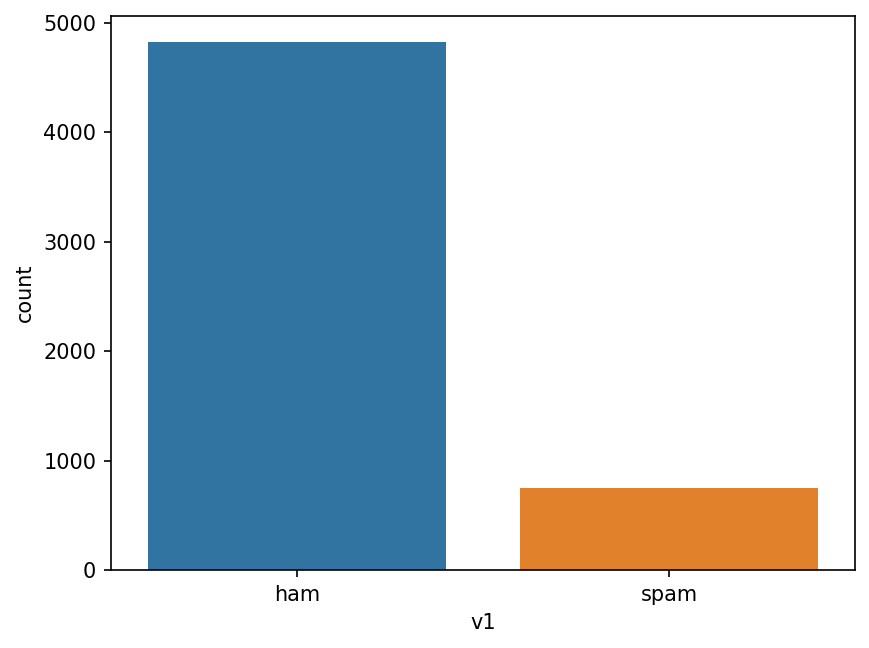

In [190]:
import seaborn as sns
plt.figure(dpi=150)
sns.countplot(data=data,x='v1')
data['v1'].value_counts()

In [191]:
#df['message_type'] = df['message_type'].map({'ham': 0, 'spam': 1}) # Mapping labels to numerical values


In [192]:
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['message_type'], test_size=0.2, random_state=42)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [193]:
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [194]:
# Training the classifier (Naive Bayes in this example)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Predictions
predictions = classifier.predict(X_test_vec)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 98.55%
Confusion Matrix:
[[887   2]
 [ 13 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [195]:
# Example usage:
new_messages = ['Can you come home soon?', 'Can we schedule a call tomorrow?','Free 1 crore hamper!']
new_messages_vec = vectorizer.transform(new_messages)
new_predictions = classifier.predict(new_messages_vec)

for message, prediction in zip(new_messages, new_predictions):
    label = 'spam' if prediction == 1 else 'ham'
    print(f'Message: {message}\nPredicted Label: {label}\n')

Message: Can you come home soon?
Predicted Label: ham

Message: Can we schedule a call tomorrow?
Predicted Label: ham

Message: Free 1 crore hamper!
Predicted Label: spam

